In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("B:\\Portfolio Projects\\Pandas FIBRAs\\FIBRAS Data Sets.xlsx")

In [3]:
df.head(5)

,Date,DANHOS13,FIBRAMQ12,FIBRAPL14,FIHO12,FINN13,FMTY14,FPLUS16,FNOVA17,FUNO11,TERRA13
0,2019-01-01,17.867968,14.007613,25.957352,8.210637,8.565029,8.701792,14.416149,12.499578,17.298304,18.734486
1,2019-02-01,17.979115,14.861817,27.627991,8.584983,8.710200,8.622686,14.564260,12.499578,17.588369,19.627256
2,2019-03-01,18.109871,14.034307,29.197142,7.894524,7.503474,8.586728,14.712371,12.499578,18.073307,20.588705
3,2019-04-01,18.546963,15.338931,32.164474,8.281273,7.412014,8.529196,13.823704,12.755862,19.043684,22.418358
4,2019-05-01,16.045492,13.909834,30.898508,7.504369,7.402748,8.486046,13.428741,12.755862,16.947933,21.287844


In [4]:
df.shape

(60, 11)

In [5]:

Col_Fibras = [ 'DANHOS13', 'FIBRAMQ12', 'FIBRAPL14', 'FIHO12', 'FINN13',
       'FMTY14', 'FPLUS16', 'FNOVA17', 'FUNO11', 'TERRA13']

print(Col_Fibras)

['DANHOS13', 'FIBRAMQ12', 'FIBRAPL14', 'FIHO12', 'FINN13', 'FMTY14', 'FPLUS16', 'FNOVA17', 'FUNO11', 'TERRA13']


In [6]:
Resultados = pd.DataFrame({'FIBRA': Col_Fibras,'Desviacion Estandar':df[Col_Fibras].std()})



print(Resultados)

               FIBRA  Desviacion Estandar
DANHOS13    DANHOS13             2.042337
FIBRAMQ12  FIBRAMQ12             4.981270
FIBRAPL14  FIBRAPL14            12.141340
FIHO12        FIHO12             2.238300
FINN13        FINN13             1.497964
FMTY14        FMTY14             1.355518
FPLUS16      FPLUS16             2.863089
FNOVA17      FNOVA17             6.658063
FUNO11        FUNO11             3.959503
TERRA13      TERRA13             3.876537


In [7]:
Resultados.columns

Index(['FIBRA', 'Desviacion Estandar'], dtype='object')

In [8]:
retornos = df[Col_Fibras].pct_change()
print(retornos.head(5))

   DANHOS13  FIBRAMQ12  FIBRAPL14    FIHO12    FINN13    FMTY14   FPLUS16  \
0       NaN        NaN        NaN       NaN       NaN       NaN       NaN   
1  0.006220   0.060981   0.064361  0.045593  0.016949 -0.009091  0.010274   
2  0.007273  -0.055680   0.056796 -0.080426 -0.138542 -0.004170  0.010169   
3  0.024136   0.092960   0.101631  0.048990 -0.012189 -0.006700 -0.060403   
4 -0.134872  -0.093168  -0.039359 -0.093815 -0.001250 -0.005059 -0.028571   

    FNOVA17    FUNO11   TERRA13  
0       NaN       NaN       NaN  
1  0.000000  0.016768  0.047654  
2  0.000000  0.027572  0.048985  
3  0.020503  0.053691  0.088867  
4  0.000000 -0.110050 -0.050428  


In [9]:
Resultados['Retornos_1'] = retornos.mean()
Resultados['Sharpe Ratio'] = Resultados['Retornos_1'] / Resultados['Desviacion Estandar']
 
print(Resultados)

               FIBRA  Desviacion Estandar  Retornos_1  Sharpe Ratio
DANHOS13    DANHOS13             2.042337    0.004994      0.002445
FIBRAMQ12  FIBRAMQ12             4.981270    0.017544      0.003522
FIBRAPL14  FIBRAPL14            12.141340    0.020744      0.001709
FIHO12        FIHO12             2.238300    0.009650      0.004311
FINN13        FINN13             1.497964   -0.003825     -0.002553
FMTY14        FMTY14             1.355518    0.006671      0.004921
FPLUS16      FPLUS16             2.863089   -0.010148     -0.003545
FNOVA17      FNOVA17             6.658063    0.014856      0.002231
FUNO11        FUNO11             3.959503    0.013701      0.003460
TERRA13      TERRA13             3.876537    0.013027      0.003360


In [10]:
TolRiesgo = int(input('Escribe tu tolerancia de riesgo (1-100): '))

TolRiesgo_Pct = (TolRiesgo - 1) / 99

Resultados['Coloca Sharpe Ratio'] = TolRiesgo_Pct * Resultados['Sharpe Ratio']
Resultados['Colocacion'] = Resultados['Coloca Sharpe Ratio'].clip(lower=0.00)



Escribe tu tolerancia de riesgo (1-100): 80


In [11]:
imprime = ['FIBRA','Colocacion']

print(Resultados[imprime])

               FIBRA  Colocacion
DANHOS13    DANHOS13    0.001951
FIBRAMQ12  FIBRAMQ12    0.002811
FIBRAPL14  FIBRAPL14    0.001363
FIHO12        FIHO12    0.003440
FINN13        FINN13    0.000000
FMTY14        FMTY14    0.003927
FPLUS16      FPLUS16    0.000000
FNOVA17      FNOVA17    0.001780
FUNO11        FUNO11    0.002761
TERRA13      TERRA13    0.002681


In [12]:
UmbralColoca = Resultados['Colocacion'].mean()
Resultados['Umbral'] = UmbralColoca

In [13]:
Resultados['Colocacion'] = Resultados['Coloca Sharpe Ratio'].apply(lambda x: 0 if x < UmbralColoca else x)


imprime = ['FIBRA','Umbral','Colocacion']
print(Resultados[imprime])

               FIBRA    Umbral  Colocacion
DANHOS13    DANHOS13  0.002072    0.000000
FIBRAMQ12  FIBRAMQ12  0.002072    0.002811
FIBRAPL14  FIBRAPL14  0.002072    0.000000
FIHO12        FIHO12  0.002072    0.003440
FINN13        FINN13  0.002072    0.000000
FMTY14        FMTY14  0.002072    0.003927
FPLUS16      FPLUS16  0.002072    0.000000
FNOVA17      FNOVA17  0.002072    0.000000
FUNO11        FUNO11  0.002072    0.002761
TERRA13      TERRA13  0.002072    0.002681


In [14]:

total_colocacion = Resultados['Colocacion'].sum()
Resultados['Colocacion'] = 100 * (Resultados['Colocacion'] / total_colocacion)
Resultados['Colocacion'] = Resultados['Colocacion'].map('{:.1f}%'.format)


DfColocacion = pd.DataFrame({'FIBRA': Resultados['FIBRA'],'Ratio': Resultados['Coloca Sharpe Ratio'],'Umbral': Resultados['Umbral'] ,'Colocacion': Resultados['Colocacion']})
print(DfColocacion)

               FIBRA     Ratio    Umbral Colocacion
DANHOS13    DANHOS13  0.001951  0.002072       0.0%
FIBRAMQ12  FIBRAMQ12  0.002811  0.002072      18.0%
FIBRAPL14  FIBRAPL14  0.001363  0.002072       0.0%
FIHO12        FIHO12  0.003440  0.002072      22.0%
FINN13        FINN13 -0.002038  0.002072       0.0%
FMTY14        FMTY14  0.003927  0.002072      25.1%
FPLUS16      FPLUS16 -0.002828  0.002072       0.0%
FNOVA17      FNOVA17  0.001780  0.002072       0.0%
FUNO11        FUNO11  0.002761  0.002072      17.7%
TERRA13      TERRA13  0.002681  0.002072      17.2%


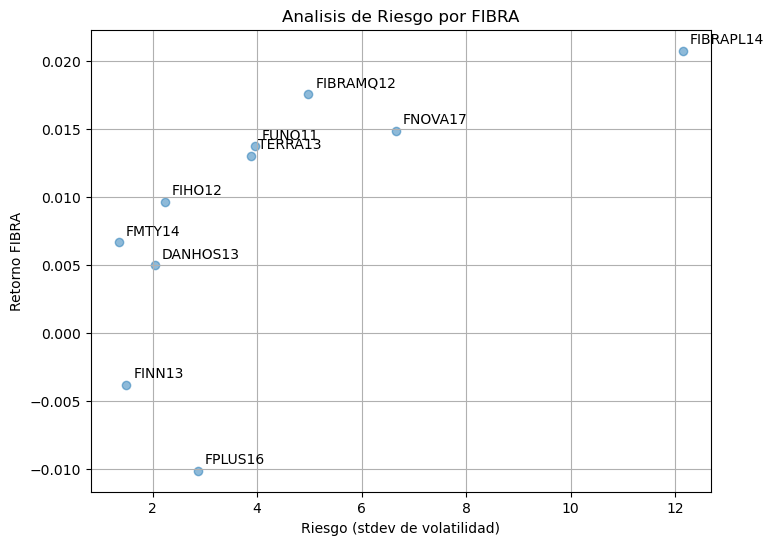

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(Resultados['Desviacion Estandar'],Resultados['Retornos_1'], alpha=0.5)

for i, FIBRA in enumerate(Resultados['FIBRA']):
    plt.annotate(FIBRA, (Resultados['Desviacion Estandar'][i], Resultados['Retornos_1'][i]), textcoords="offset points", xytext=(5,5), ha='left')

plt.title('Analisis de Riesgo por FIBRA')
plt.xlabel('Riesgo (stdev de volatilidad)')
plt.ylabel('Retorno FIBRA')
plt.grid(True)
plt.show()